# Проект "Выгрузка данных из базы данных книжного сервиса"

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подключение-к-базе-данных" data-toc-modified-id="Подключение-к-базе-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подключение к базе данных</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-таблицы-books" data-toc-modified-id="Обзор-таблицы-books-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обзор таблицы books</a></span></li><li><span><a href="#Обзор-таблицы-authors" data-toc-modified-id="Обзор-таблицы-authors-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обзор таблицы authors</a></span></li><li><span><a href="#Обзор-таблицы-publishers" data-toc-modified-id="Обзор-таблицы-publishers-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обзор таблицы publishers</a></span></li><li><span><a href="#Обзор-таблицы-ratings" data-toc-modified-id="Обзор-таблицы-ratings-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Обзор таблицы ratings</a></span></li><li><span><a href="#Обзор-таблицы-reviews" data-toc-modified-id="Обзор-таблицы-reviews-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Обзор таблицы reviews</a></span></li></ul></li><li><span><a href="#Решение-задач" data-toc-modified-id="Решение-задач-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Решение задач</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Описание исследования

**Цель исследования:**  
- Поступила задача от сервиса, который предлагает чтение книг по подписке. Необходимо проанализировать базу данных сервиса, cделав выгрузку данных в соответсвии с задачами, и сделать выводы. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Источники данных**:
- База данных `data-analyst-final-project-db` —  содержит таблицы:
    - Таблица `books` — содержит данные о книгах;
    - Таблица `authors` — содержит данные об авторах;
    - Таблица `publishers` — cодержит данные об издательствах;
    - Таблица `ratings` — содержит данные о пользовательских оценках книг;
    - Таблица `reviews` — содержит данные о пользовательских обзорах.

**Задачи**: 
- Посчитать количество книг, изданных после 1 января 2000 года;
- Посчитать количество обзоров и среднюю оценку каждой книги;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц (не брошюры);
- Определить автора с самой высокой средней оценкой книг, учитывая только книги с 50 и более оценками;
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

**Окружение:**
- Anaconda 2.3.2
    
**Инструменты**:  
- Yupyter Notebook 6.5.2
    - toc2
- Python 3.9.13
    - pandas 1.2.4
    - sqlalchemy 1.4.15

## Описание данных

Таблица **books** — содержит данные о книгах:
- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

Таблица **authors** — содержит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора.

Таблица **publishers** — cодержит данные об издательствах:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства.

Таблица **ratings** — содержит данные о пользовательских оценках книг:
- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

Таблица **reviews** — содержит данные о пользовательских обзорах:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя автора обзора;
- `text` — текст обзора.

**Схема базы данных:**
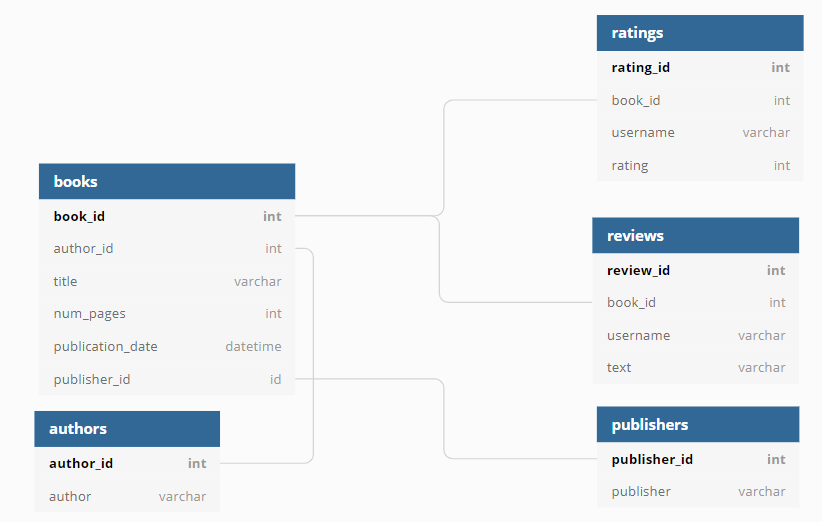

## Подключение к базе данных

Создадим подключение к базе данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

# задаем параметры подключения
db_config = {
    'user': 'praktikum_student',                         # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp',                             # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', # хост
    'port': 6432,                                        # порт подключения
    'db': 'data-analyst-final-project-db'                # название базы данных
} 

# задаем строку с параметрами подключения
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'], 
    db_config['pwd'], 
    db_config['host'], 
    db_config['port'],
    db_config['db']
) 

# создаем подключение
engine = create_engine(connection_string, 
                       connect_args={'sslmode':'require'})

## Обзор данных

Сделаем обзор таблиц базы данных.

### Обзор таблицы books

Выведем первые 5 строк, а также количество строк таблицы **books**, которая содержит данные о книгах. 

Столбцы таблицы **books**:
- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

In [2]:
# выводим первые 5 строк
query = '''
SELECT * FROM books LIMIT 5
'''
result = pd.read_sql_query(query, con = engine)
print('Первые 5 строк:')
display(result)
print('')

# выводим количество строк
query = '''
SELECT COUNT(*)
FROM books
'''
result = pd.read_sql_query(query, con = engine)
print('Количество строк: ', result.loc[0,'count'])

Первые 5 строк:


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268



Количество строк:  1000


**Вывод:**
- Всего 1000 строк

Проверим таблицу на явные дубликаты.

In [3]:
# считаем явные дубликаты
query = '''
SELECT COUNT(*) AS count_duplicates
FROM (
    SELECT *
    FROM books
    GROUP BY book_id,
             author_id,
             title,
             num_pages,
             publication_date,
             publisher_id 
    HAVING COUNT(*) > 1
) AS duplicates
'''
display(pd.read_sql_query(query, con = engine))

,count_duplicates
0,0


**Вывод:**
- Явных дубликатов нет

Проверим каждый столбец таблицы на пропуски.

In [4]:
# считаем число пропусков в столбце book_id
query = '''
SELECT COUNT(*) - COUNT(book_id) AS count_null_book_id
FROM books
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце author_id
query = '''
SELECT COUNT(*) - COUNT(author_id) AS count_null_author_id
FROM books
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце title
query = '''
SELECT COUNT(*) - COUNT(title) AS count_null_title
FROM books
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце num_pages
query = '''
SELECT COUNT(*) - COUNT(num_pages) AS count_null_num_pages
FROM books
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце publication_date
query = '''
SELECT COUNT(*) - COUNT(publication_date) AS count_null_publication_date
FROM books
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце publisher_id
query = '''
SELECT COUNT(*) - COUNT(publisher_id) AS count_null_publisher_id
FROM books
'''
display(pd.read_sql_query(query, con = engine))

,count_null_book_id
0,0


,count_null_author_id
0,0


,count_null_title
0,0


,count_null_num_pages
0,0


,count_null_publication_date
0,0


,count_null_publisher_id
0,0


**Вывод:**
- Пропусков нет

Посчитаем количество уникальных значений в каждом столбце.

In [5]:
# считаем уникальные значения столбца book_id
query = '''
SELECT COUNT(DISTINCT book_id) AS count_unique_book_id
FROM books
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца author_id
query = '''
SELECT COUNT(DISTINCT author_id) AS count_unique_author_id
FROM books
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца title
query = '''
SELECT COUNT(DISTINCT title) AS count_unique_title
FROM books
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца num_pages
query = '''
SELECT COUNT(DISTINCT num_pages) AS count_unique_num_pages
FROM books
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца publication_date
query = '''
SELECT COUNT(DISTINCT publication_date) AS count_unique_publication_date
FROM books
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца publisher_id
query = '''
SELECT COUNT(DISTINCT publisher_id) AS count_unique_publisher_id
FROM books
'''
display(pd.read_sql_query(query, con = engine))

,count_unique_book_id
0,1000


,count_unique_author_id
0,636


,count_unique_title
0,999


,count_unique_num_pages
0,454


,count_unique_publication_date
0,618


,count_unique_publisher_id
0,340


**Выводы:**
- Число уникальных id книг равно числу строк таблицы - значит в id книг нет дубликатов
- Число уникальных заголовков книг не равно числу строк таблицы - значит есть книги с одинаковым названием

Посмотрим на книги с одинаковыми названиями.

In [6]:
# ищем книги с одинаковым названием
query = '''
SELECT title, COUNT(*)
FROM books
GROUP BY title
HAVING COUNT(*) > 1
'''
display(pd.read_sql_query(query, con = engine))

,title,count
0,Memoirs of a Geisha,2


In [7]:
# выводим информацию по книгам с одинаковым названием
query = '''
SELECT *
FROM books
WHERE title = 'Memoirs of a Geisha'
'''
display(pd.read_sql_query(query, con = engine))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,426,39,Memoirs of a Geisha,434,2005-11-15,241
1,427,39,Memoirs of a Geisha,503,2005-11-22,311


**Вывод:**
- Есть две книги с одинаковым названием Memoirs of a Geisha. Судя по данным в остальных столбцах это разные книги или одна и та же книга, только изданная в разных издательствах под одним и тем же названием.

### Обзор таблицы authors

Выведем первые 5 строк, а также количество строк таблицы **authors**, которая содержит данные об авторах.

Столбцы таблицы **authors**:
- `author_id` — идентификатор автора;
- `author` — имя автора.

In [8]:
# выводим первые 5 строк
query = '''
SELECT *
FROM authors
LIMIT 5
'''
result = pd.read_sql_query(query, con = engine)
print('Первые 5 строк:')
display(result)
print('')

# выводим число строк
query = '''
SELECT COUNT(*)
FROM authors
'''
result = pd.read_sql_query(query, con = engine)
print('Количество строк: ', result.loc[0,'count'])

Первые 5 строк:


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



Количество строк:  636


**Выводы:**
- Если у книги несколько авторов, похоже, они записываются вместе как единый автор
- Всего 636 авторов

Проверим таблицу на явные дубликаты.

In [9]:
# считаем явные дубликаты
query = '''
SELECT COUNT(*) AS count_duplicates
FROM (
    SELECT *
    FROM authors
    GROUP BY author_id,
             author
    HAVING COUNT(*) > 1
) AS duplicates
'''
display(pd.read_sql_query(query, con = engine))

,count_duplicates
0,0


**Вывод:**
- Явных дубликатов нет

Проверим каждый столбец таблицы на пропуски.

In [10]:
# считаем число пропусков в столбце author_id
query = '''
SELECT COUNT(*) - COUNT(author_id) AS count_null_author_id
FROM authors
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце author
query = '''
SELECT COUNT(*) - COUNT(author) AS count_null_author
FROM authors
'''
display(pd.read_sql_query(query, con = engine))

,count_null_author_id
0,0


,count_null_author
0,0


**Вывод:**
- Пропусков нет

Посчитаем количество уникальных значений в каждом столбце.

In [11]:
# считаем уникальные значения столбца author_id
query = '''
SELECT COUNT(DISTINCT author_id) AS count_unique_author_id
FROM authors
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца author
query = '''
SELECT COUNT(DISTINCT author) AS count_unique_author
FROM authors
'''
display(pd.read_sql_query(query, con = engine))

,count_unique_author_id
0,636


,count_unique_author
0,636


**Выводы:**
- Число уникальных id авторов равно числу строк таблицы - значит в id авторов нет дубликатов
- Число уникальных имен авторов равно числу строк таблицы - значит в именах авторов нет дубликатов

### Обзор таблицы publishers

Выведем первые 5 строк, а также количество строк таблицы **publishers**, которая cодержит данные об издательствах.

Столбцы таблицы **publishers**:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства.

In [12]:
# выводим первые 5 строк
query = '''
SELECT *
FROM publishers
LIMIT 5'''
result = pd.read_sql_query(query, con = engine)
print('Первые 5 строк:')
display(result)
print('')

# выводим число строк
query = '''
SELECT COUNT(*)
FROM publishers'''
result = pd.read_sql_query(query, con = engine)
print('Количество строк: ', result.loc[0,'count'])

Первые 5 строк:


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company



Количество строк:  340


**Выводы:**
- Всего 340 издательств

Проверим таблицу на явные дубликаты.

In [13]:
# считаем явные дубликаты
query = '''
SELECT COUNT(*) AS count_duplicates
FROM (
    SELECT *
    FROM publishers
    GROUP BY publisher_id,
             publisher
    HAVING COUNT(*) > 1
) AS duplicates
'''
display(pd.read_sql_query(query, con = engine))

,count_duplicates
0,0


**Вывод:**
- Явных дубликатов нет

Проверим каждый столбец таблицы на пропуски.

In [14]:
# считаем число пропусков в столбце publisher_id
query = '''
SELECT COUNT(*) - COUNT(publisher_id) AS count_null_publisher_id
FROM publishers
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце publisher
query = '''
SELECT COUNT(*) - COUNT(publisher) AS count_null_publisher
FROM publishers
'''
display(pd.read_sql_query(query, con = engine))

,count_null_publisher_id
0,0


,count_null_publisher
0,0


**Вывод:**
- Пропусков нет

Посчитаем количество уникальных значений в каждом столбце.

In [15]:
# считаем уникальные значения столбца publisher_id
query = '''
SELECT COUNT(DISTINCT publisher_id) AS count_unique_publisher_id
FROM publishers
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца publisher
query = '''
SELECT COUNT(DISTINCT publisher) AS count_unique_publisher
FROM publishers
'''
display(pd.read_sql_query(query, con = engine))

,count_unique_publisher_id
0,340


,count_unique_publisher
0,340


**Выводы:**
- Число уникальных id издательств равно числу строк таблицы - значит в id издательств нет дубликатов
- Число уникальных названий издательств равно числу строк таблицы - значит в названиях издательств нет дубликатов

### Обзор таблицы ratings

Выведем первые 5 строк, а также количество строк таблицы **ratings**, которая содержит данные о пользовательских оценках книг.

Столбцы таблицы **ratings**:
- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

In [16]:
# выводим первые 5 строк
query = '''
SELECT *
FROM ratings
LIMIT 5
'''
result = pd.read_sql_query(query, con = engine)
print('Первые 5 строк:')
display(result)
print('')

# выводим число строк
query = '''
SELECT COUNT(*)
FROM ratings'''
result = pd.read_sql_query(query, con = engine)
print('Количество строк: ', result.loc[0,'count'])

Первые 5 строк:


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2



Количество строк:  6456


**Выводы:**
- Всего 6456 оценок

Проверим таблицу на явные дубликаты.

In [17]:
# считаем явные дубликаты
query = '''
SELECT COUNT(*) AS count_duplicates
FROM (
    SELECT *
    FROM ratings
    GROUP BY rating_id,
             book_id,
             username,
             rating
    HAVING COUNT(*) > 1
) AS duplicates
'''
display(pd.read_sql_query(query, con = engine))

,count_duplicates
0,0


**Вывод:**
- Явных дубликатов нет

Проверим каждый столбец таблицы на пропуски.

In [18]:
# считаем число пропусков в столбце rating_id
query = '''
SELECT COUNT(*) - COUNT(rating_id) AS count_null_rating_id
FROM ratings
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце book_id
query = '''
SELECT COUNT(*) - COUNT(book_id) AS count_null_book_id
FROM ratings
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце username
query = '''
SELECT COUNT(*) - COUNT(username) AS count_null_username
FROM ratings
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце rating
query = '''
SELECT COUNT(*) - COUNT(rating) AS count_null_rating
FROM ratings
'''
display(pd.read_sql_query(query, con = engine))

,count_null_rating_id
0,0


,count_null_book_id
0,0


,count_null_username
0,0


,count_null_rating
0,0


**Вывод:**
- Пропусков нет

Посчитаем количество уникальных значений в каждом столбце.

In [19]:
# считаем уникальные значения столбца rating_id
query = '''
SELECT COUNT(DISTINCT rating_id) AS count_unique_rating_id
FROM ratings
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца book_id
query = '''
SELECT COUNT(DISTINCT book_id) AS count_unique_book_id
FROM ratings
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца username
query = '''
SELECT COUNT(DISTINCT username) AS count_unique_username
FROM ratings
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца rating
query = '''
SELECT COUNT(DISTINCT rating) AS count_unique_rating
FROM ratings
'''
display(pd.read_sql_query(query, con = engine))

,count_unique_rating_id
0,6456


,count_unique_book_id
0,1000


,count_unique_username
0,160


,count_unique_rating
0,5


**Выводы:**
- Число уникальных id рейтингов равно числу строк таблицы - значит в id рейтингов нет дубликатов
- Всего 160 уникальных пользователей
- Всего 5 уникальных оценок

 ### Обзор таблицы reviews

Выведем первые 5 строк, а также количество строк таблицы **reviews**, которая содержит данные о пользовательских обзорах.

Столбцы таблицы **reviews**:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя автора обзора;
- `text` — текст обзора.

In [20]:
# выводим первые 5 строк
query = '''
SELECT *
FROM reviews
LIMIT 5
'''
result = pd.read_sql_query(query, con = engine)
print('Первые 5 строк:')
display(result)
print('')

# выводим число строк
query = '''
SELECT COUNT(*)
FROM reviews'''
result = pd.read_sql_query(query, con = engine)
print('Количество строк: ', result.loc[0,'count'])

Первые 5 строк:


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...



Количество строк:  2793


**Выводы:**
- Всего 2793 обзора

Проверим таблицу на явные дубликаты.

In [21]:
# считаем явные дубликаты
query = '''
SELECT COUNT(*) AS count_duplicates
FROM (
    SELECT *
    FROM reviews
    GROUP BY review_id,
             book_id,
             username,
             text
    HAVING COUNT(*) > 1
) AS duplicates
'''
display(pd.read_sql_query(query, con = engine))

,count_duplicates
0,0


**Вывод:**
- Явных дубликатов нет

Проверим каждый столбец таблицы на пропуски.

In [22]:
# считаем число пропусков в столбце review_id
query = '''
SELECT COUNT(*) - COUNT(review_id) AS count_null_review_id
FROM reviews
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце book_id
query = '''
SELECT COUNT(*) - COUNT(book_id) AS count_null_book_id
FROM ratings
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце username
query = '''
SELECT COUNT(*) - COUNT(username) AS count_null_username
FROM ratings
'''
display(pd.read_sql_query(query, con = engine))

# считаем число пропусков в столбце text
query = '''
SELECT COUNT(*) - COUNT(text) AS count_null_text
FROM reviews
'''
display(pd.read_sql_query(query, con = engine))

,count_null_review_id
0,0


,count_null_book_id
0,0


,count_null_username
0,0


,count_null_text
0,0


**Вывод:**
- Пропусков нет

Посчитаем количество уникальных значений в каждом столбце.

In [23]:
# считаем уникальные значения столбца review_id
query = '''
SELECT COUNT(DISTINCT review_id) AS count_unique_review_id
FROM reviews
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца book_id
query = '''
SELECT COUNT(DISTINCT book_id) AS count_unique_book_id
FROM reviews
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца username
query = '''
SELECT COUNT(DISTINCT username) AS count_unique_username
FROM reviews
'''
display(pd.read_sql_query(query, con = engine))

# считаем уникальные значения столбца text
query = '''
SELECT COUNT(DISTINCT text) AS count_unique_text
FROM reviews
'''
display(pd.read_sql_query(query, con = engine))

,count_unique_review_id
0,2793


,count_unique_book_id
0,994


,count_unique_username
0,160


,count_unique_text
0,2793


**Выводы:**
- Число уникальных id обзоров равно числу строк таблицы - значит в id обзоров нет дубликатов

## Решение задач

Посчитаем количество книг, изданных после 1 января 2000 года.

In [24]:
# задаем текст SQL-запроса
query = '''
SELECT COUNT(book_id) AS count_books
FROM books
WHERE publication_date > '2000-01-01'
'''

# делаем SQL-запрос
pd.read_sql_query(query, con = engine)

,count_books
0,819


**Выводы:**
- После 1 января 2000 года вышло 819 книг.

Посчитаем количество обзоров и среднюю оценку каждой книги.

In [25]:
# задаем текст SQL-запроса
query = '''
WITH
-- считаем среднюю оценку каждой книги
t1 AS (
    SELECT b.book_id,
           title, 
           ROUND(AVG(rating),2) AS avg_rating
    FROM books AS b
    LEFT JOIN ratings AS ra ON b.book_id=ra.book_id
    GROUP BY b.book_id,
             title
),
-- считаем число обзоров каждой книги
t2 AS (
    SELECT b.book_id,
           title, 
           COUNT(review_id) AS count_reviews
    FROM books AS b
    LEFT JOIN reviews AS re ON b.book_id=re.book_id
    GROUP BY b.book_id,
             title
)

-- выводим для каждой книги ее средний рейтинг и число обзоров
SELECT b.book_id,
       b.title,
       avg_rating,
       count_reviews
FROM books AS b
LEFT JOIN t1 ON b.book_id=t1.book_id
LEFT JOIN t2 ON b.book_id=t2.book_id
ORDER BY count_reviews DESC
'''

# делаем SQL-запрос
pd.read_sql_query(query, con = engine)

,book_id,title,avg_rating,count_reviews
0,948,Twilight (Twilight #1),3.66,7
1,695,The Curious Incident of the Dog in the Night-Time,4.08,6
2,299,Harry Potter and the Chamber of Secrets (Harry...,4.29,6
3,696,The Da Vinci Code (Robert Langdon #2),3.83,6
4,734,The Glass Castle,4.21,6
...,...,...,...,...
995,672,The Cat in the Hat and Other Dr. Seuss Favorites,5.00,0
996,808,The Natural Way to Draw,3.00,0
997,221,Essential Tales and Poems,4.00,0
998,83,Anne Rice's The Vampire Lestat: A Graphic Novel,3.67,0


**Выводы:**
- Наибольшее число обзоров у книги Twilight (Twilight #1) - 7 обзоров
- Есть книги с оценками, но без обзоров

Определим издательство, которое выпустило наибольшее число книг толще 50 страниц (не брошюры).

In [26]:
# задаем текст SQL-запроса
query = '''
-- считаем число книг для каждого издательства
SELECT publisher_id,
       publisher,
       COUNT(book_id) AS count_books
FROM (
    -- отбираем книги больше 50 страниц
    SELECT b.publisher_id,
           publisher,
           book_id
    FROM books AS b
    JOIN publishers AS p ON b.publisher_id=p.publisher_id
    WHERE num_pages > 50
) AS t
GROUP BY publisher_id,
         publisher
ORDER BY count_books DESC
'''

# делаем SQL-запрос
pd.read_sql_query(query, con = engine)

,publisher_id,publisher,count_books
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,33,Ballantine Books,19
...,...,...,...
329,148,Harvard Business Review Press,1
330,302,Tyndale House Publishers,1
331,66,Corgi Childrens,1
332,230,Pocket Books / Simon & Schuster Inc.,1


**Выводы:**
- Наибольшее число книг больше 50 страниц выпустило издательство Penguin Books - 42 книги.

Определим автора с самой высокой средней оценкой книг, учитывая только книги с 50 и более оценками.

In [27]:
# задаем текст SQL-запроса
query = '''
-- отбираем книги с 50 и более оценками
WITH t AS (
    SELECT book_id
    FROM (
        SELECT b.book_id,
               COUNT(rating_id)
        FROM books AS b
        JOIN ratings AS r ON b.book_id=r.book_id
        GROUP BY b.book_id
    ) AS t
    WHERE count >= 50
)

-- считаем среднюю оценку книг для каждого автора
SELECT a.author_id,
       author, 
       ROUND(AVG(rating),2) AS avg_rating
FROM books AS b
JOIN authors AS a ON b.author_id=a.author_id
JOIN ratings AS r1 ON b.book_id=r1.book_id
WHERE b.book_id IN (
    SELECT book_id
    FROM t
)
GROUP BY a.author_id,
         author
ORDER BY avg_rating DESC
'''

# делаем SQL-запрос
pd.read_sql_query(query, con = engine)

,author_id,author,avg_rating
0,236,J.K. Rowling/Mary GrandPré,4.29
1,402,Markus Zusak/Cao Xuân Việt Khương,4.26
2,240,J.R.R. Tolkien,4.25
3,376,Louisa May Alcott,4.19
4,498,Rick Riordan,4.08
5,621,William Golding,3.90
6,235,J.D. Salinger,3.83
7,469,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.79
8,630,William Shakespeare/Paul Werstine/Barbara A. M...,3.79
9,372,Lois Lowry,3.75


**Выводы:**
- Автор с наивысшей оценкой книг среди книг с 50 и более оценками - J.K. Rowling/Mary GrandPré. Средняя оценка: 4.29

Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [28]:
# задаем текст SQL-запроса
query = '''
WITH
-- отбираем пользователей с более чем 48 оценками 
t1 AS (
    SELECT username
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating) > 48
),
-- считаем обзоры отобранных пользователей
t2 AS (
    SELECT username,
           COUNT(review_id)
    FROM reviews
    WHERE username IN (
        SELECT username
        FROM t1
    )
    GROUP BY username 
)

-- считаем среднее количество обзоров от отобранных пользователей
SELECT ROUND(AVG(count),2) AS avg_count_reviews
FROM t2

'''

# делаем SQL-запрос
pd.read_sql_query(query, con = engine)

,avg_count_reviews
0,24.0


**Выводы:**
- Среднее число обзоров от пользователей, которые поставили более 48 оценок, равно 24 обзорам.

## Выводы

**В ходе исследования выполнено:**
- Сделан обзор таблиц базы данных
- Выполнены задачи исследования

**Итоговые выводы по исследованию:**
- После 1 января 2000 года вышло 819 книг.
- Наибольшее число обзоров у книги Twilight (Twilight #1) - 7 обзоров.
- Наибольшее число книг больше 50 страниц выпустило издательство Penguin Books - 42 книги.
- Автор с наивысшей оценкой книг (среди книг с 50 и более оценками) - J.K. Rowling/Mary GrandPré. Средняя оценка: 4.29
- Среднее число обзоров от пользователей, которые поставили более 48 оценок, равно 24 обзорам.